# groupby

- 파이썬으로 테이블 다루기
- 데이터 프레임 시각화 연습

## 데이터 생성

## import

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from numpy.random import choice

## 임의의 판매 데이터 생성

In [63]:
year = choice(np.arange(2016,2021),30)
year

array([2018, 2019, 2019, 2019, 2020, 2016, 2019, 2018, 2018, 2019, 2019,
       2017, 2020, 2019, 2017, 2016, 2017, 2018, 2019, 2018, 2018, 2018,
       2016, 2018, 2016, 2020, 2019, 2017, 2019, 2018])

In [64]:
item = choice(("A", "B", "C"),30); item

array(['C', 'C', 'A', 'B', 'A', 'A', 'C', 'B', 'A', 'C', 'B', 'B', 'B',
       'B', 'B', 'C', 'A', 'C', 'A', 'C', 'A', 'C', 'C', 'A', 'C', 'A',
       'B', 'A', 'C', 'C'], dtype='<U1')

In [65]:
no = choice(np.arange(3,9),30)
price = choice(np.arange(20,50,10),30)

df = pd.DataFrame({"year":year, "item":item, "no":no,  'price':price})
df

,year,item,no,price
0,2018,C,8,30
1,2019,C,4,40
2,2019,A,6,30
3,2019,B,7,40
4,2020,A,5,30
5,2016,A,3,30
6,2019,C,4,30
7,2018,B,4,20
8,2018,A,7,20
9,2019,C,3,30


In [66]:
df_year =  df.groupby("year")
df_year

# groupby 특성

In [67]:
df_year.ngroups # 그룹 수

5

In [68]:
df_year.groups # 그룹에 속한 인덱스 보기

{2016: [5, 15, 22, 24], 2017: [11, 14, 16, 27], 2018: [0, 7, 8, 17, 19, 20, 21, 23, 29], 2019: [1, 2, 3, 6, 9, 10, 13, 18, 26, 28], 2020: [4, 12, 25]}

In [69]:
df_year.size()

year
2016     4
2017     4
2018     9
2019    10
2020     3
dtype: int64

In [70]:
df_year.count()

,item,no,price
year,,,
2016,4,4,4
2017,4,4,4
2018,9,9,9
2019,10,10,10
2020,3,3,3


In [71]:
df_year.get_group(2019)

,year,item,no,price
1,2019,C,4,40
2,2019,A,6,30
3,2019,B,7,40
6,2019,C,4,30
9,2019,C,3,30
10,2019,B,8,20
13,2019,B,6,30
18,2019,A,7,40
26,2019,B,7,20
28,2019,C,4,40


In [72]:
df

,year,item,no,price
0,2018,C,8,30
1,2019,C,4,40
2,2019,A,6,30
3,2019,B,7,40
4,2020,A,5,30
5,2016,A,3,30
6,2019,C,4,30
7,2018,B,4,20
8,2018,A,7,20
9,2019,C,3,30


In [73]:
for item, group in df.groupby('item'):
    group.to_csv(item + '.csv')
    print(item)
    print(group)
    print(group['no'].mean())

A
    year item  no  price
2   2019    A   6     30
4   2020    A   5     30
5   2016    A   3     30
8   2018    A   7     20
16  2017    A   3     40
18  2019    A   7     40
20  2018    A   7     20
23  2018    A   5     30
25  2020    A   6     30
27  2017    A   5     40
5.4
B
    year item  no  price
3   2019    B   7     40
7   2018    B   4     20
10  2019    B   8     20
11  2017    B   4     20
12  2020    B   5     40
13  2019    B   6     30
14  2017    B   6     40
26  2019    B   7     20
5.875
C
    year item  no  price
0   2018    C   8     30
1   2019    C   4     40
6   2019    C   4     30
9   2019    C   3     30
15  2016    C   6     40
17  2018    C   7     30
19  2018    C   5     30
21  2018    C   8     20
22  2016    C   5     40
24  2016    C   6     20
28  2019    C   4     40
29  2018    C   5     40
5.416666666666667


In [74]:
!cat B.csv 
# !typr A.csv # 윈도우에서

,year,item,no,price
3,2019,B,7,40
7,2018,B,4,20
10,2019,B,8,20
11,2017,B,4,20
12,2020,B,5,40
13,2019,B,6,30
14,2017,B,6,40
26,2019,B,7,20


In [75]:
df_year.no.agg(['max', 'min', 'count', 'median', 'mean', 'size','std'])

,max,min,count,median,mean,size,std
year,,,,,,,
2016,6,3,4,5.5,5.000000,4,1.414214
2017,6,3,4,4.5,4.500000,4,1.290994
2018,8,4,9,7.0,6.222222,9,1.481366
2019,8,3,10,6.0,5.600000,10,1.712698
2020,6,5,3,5.0,5.333333,3,0.577350


In [76]:
def big_sale(x):
    m = x.mean()
    
    return True if m > 3 else False
df_year.no.agg(['max', 'mean',  big_sale])

,max,mean,big_sale
year,,,
2016,6,5.000000,True
2017,6,4.500000,True
2018,8,6.222222,True
2019,8,5.600000,True
2020,6,5.333333,True


In [77]:
df_year.no.max()

year
2016    6
2017    6
2018    8
2019    8
2020    6
Name: no, dtype: int64

In [78]:
df_year.mean() # 모든 수치형 컬럼에 적용된다

,no,price
year,,
2016,5.000000,32.500000
2017,4.500000,35.000000
2018,6.222222,26.666667
2019,5.600000,32.000000
2020,5.333333,33.333333


## 트랜스폼
- apply()와 유사하다

In [79]:
standardization = lambda x: (x - x.mean()) / x.std()
# 데이터프레임에 시리즈를 대상으로 apply() 수행하는 것과 유하
df_year.no.transform(standardization)

0     1.200094
1    -0.934199
2     0.233550
3     0.817424
4    -0.577350
5    -1.414214
6    -0.934199
7    -1.500117
8     0.525041
9    -1.518073
10    1.401298
11   -0.387298
12   -0.577350
13    0.233550
14    1.161895
15    0.707107
16   -1.161895
17    0.525041
18    0.817424
19   -0.825064
20    0.525041
21    1.200094
22    0.000000
23   -0.825064
24    0.707107
25    1.154701
26    0.817424
27    0.387298
28   -0.934199
29   -0.825064
Name: no, dtype: float64

## 필터
- 조건에 맞는 샘플만 얻는다

In [80]:
df

,year,item,no,price
0,2018,C,8,30
1,2019,C,4,40
2,2019,A,6,30
3,2019,B,7,40
4,2020,A,5,30
5,2016,A,3,30
6,2019,C,4,30
7,2018,B,4,20
8,2018,A,7,20
9,2019,C,3,30


In [81]:
df.groupby('item').groups

{'A': [2, 4, 5, 8, 16, 18, 20, 23, 25, 27], 'B': [3, 7, 10, 11, 12, 13, 14, 26], 'C': [0, 1, 6, 9, 15, 17, 19, 21, 22, 24, 28, 29]}

In [82]:
df.groupby('item').filter(lambda x: len(x) > 8 )

,year,item,no,price
0,2018,C,8,30
1,2019,C,4,40
2,2019,A,6,30
4,2020,A,5,30
5,2016,A,3,30
6,2019,C,4,30
8,2018,A,7,20
9,2019,C,3,30
15,2016,C,6,40
16,2017,A,3,40


##  이중 그루핑
- 인덱스를 이중으로

In [83]:
df1 = df.groupby(['item','year']).sum(); df1

no  price
item year           
A    2016   3     30
     2017   8     80
     2018  19     70
     2019  13     70
     2020  11     60
B    2017  10     60
     2018   4     20
     2019  28    110
     2020   5     40
C    2016  17    100
     2018  33    150
     2019  15    140

In [84]:
df1["total"] = df1.no*df1.price
df1

no  price  total
item year                  
A    2016   3     30     90
     2017   8     80    640
     2018  19     70   1330
     2019  13     70    910
     2020  11     60    660
B    2017  10     60    600
     2018   4     20     80
     2019  28    110   3080
     2020   5     40    200
C    2016  17    100   1700
     2018  33    150   4950
     2019  15    140   2100

## (연습) 이중인덱스를 year-item 순으로 하여 총합을 구하시오

In [85]:
# (풀이)



In [86]:
# 인덱스를 한 단계로 행별로 만들기 (item을 컬럼으로 승격)
df2 = df.groupby(['year','item']).sum().reset_index(level='item'); df2

,item,no,price
year,,,
2016,A,3,30
2016,C,17,100
2017,A,8,80
2017,B,10,60
2018,A,19,70
2018,B,4,20
2018,C,33,150
2019,A,13,70
2019,B,28,110


# 데이터프레임 시각화

<AxesSubplot:xlabel='item,year'>

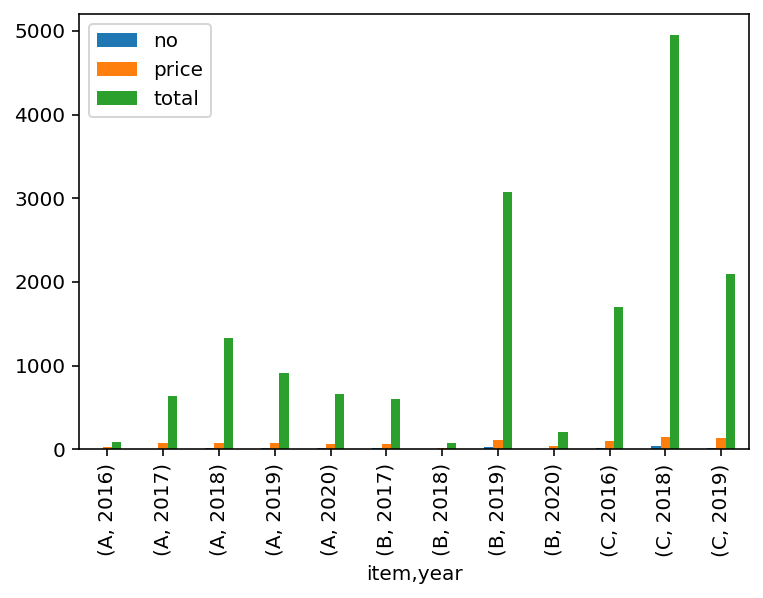

In [87]:
df1.plot.bar()

## bar 그래프

<AxesSubplot:xlabel='item'>

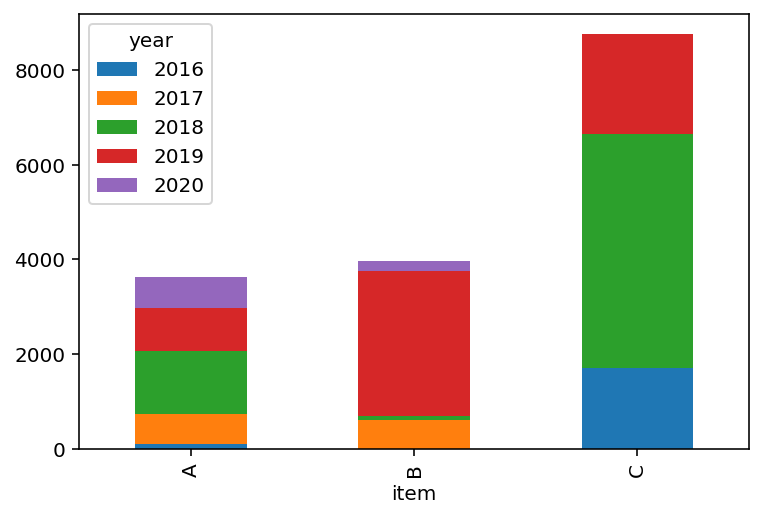

In [88]:
df1.total.unstack(level='year').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='year'>

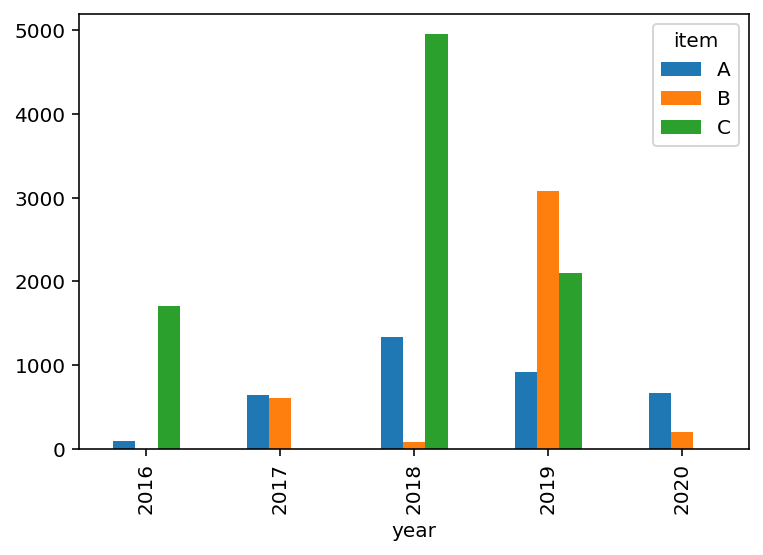

In [89]:
df1.total.unstack(level='item').plot(kind='bar')

## 면적 그래프

<AxesSubplot:xlabel='year'>

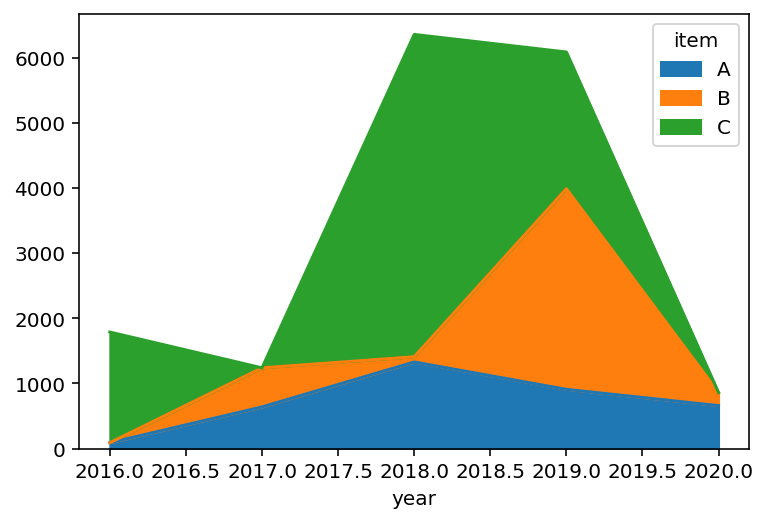

In [90]:
df1.total.unstack(level='item').plot.area()

## 버블 차트

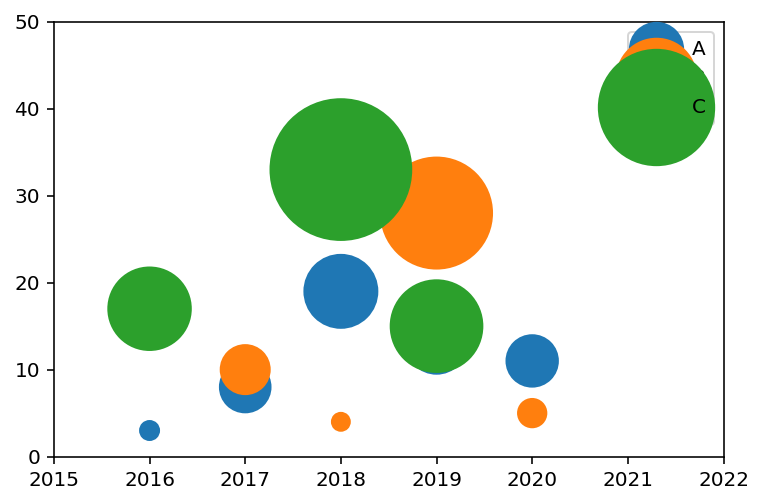

In [91]:
plt.xlim(2015,2022)
plt.ylim(0,50)
for item in ["A", "B", "C"]:
    df3 = df1.loc[item]
    plt.scatter(df3.index, df3.no, s=df3.total, label=item)
plt.legend()


## (연습) 위의 버블 차트에서 버블의 크기를 1/2로 줄여보시오

In [92]:
# (풀이)



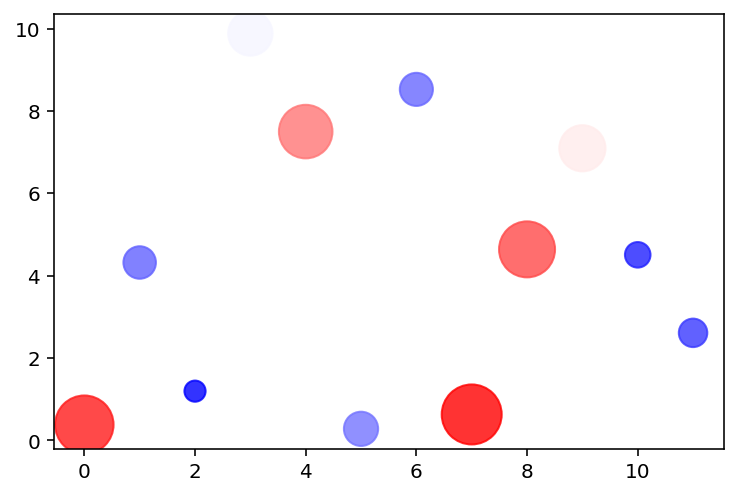

In [93]:
amount = np.random.rand(12)
size = amount*1000
y = np.random.rand(12)*10
plt.scatter(range(12), y,  s=size, c=amount, cmap='bwr', alpha=0.8)

# 정답

## (연습) 이중인덱스를 year-item 순으로 하여 총합을 구하시오

In [94]:
df.groupby(['year','item']).sum()

no  price
year item           
2016 A      3     30
     C     17    100
2017 A      8     80
     B     10     60
2018 A     19     70
     B      4     20
     C     33    150
2019 A     13     70
     B     28    110
     C     15    140
2020 A     11     60
     B      5     40

## (연습) 위의 버블 차트에서 버블의 크기를 1/2로 줄여보시오

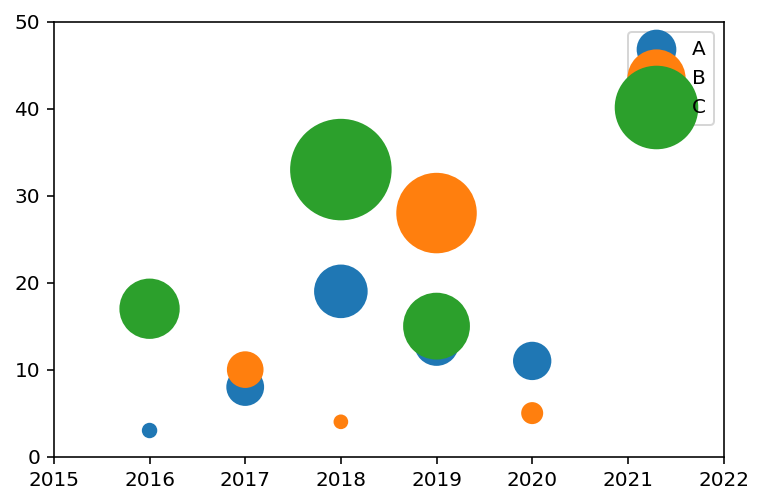

In [95]:
plt.xlim(2015,2022)
plt.ylim(0,50)
for item in ["A", "B", "C"]:
    df3 = df1.loc[item]
    plt.scatter(df3.index, df3.no, s=df3.total/2, label=item)
plt.legend()